# Introduction to Call Center Simulation

Purpose of the Notebook:
This notebook aims to simulate a call center's operations to understand the dynamics of customer service, employee efficiency, and operational management. Through progressively complex simulations, we explore basic operations, the impact of dynamic support times based on query complexity, the integration of priority queues for VIP customers, and the effects of employee skill levels on handling times. This project employs simpy for event simulation, numpy and pandas for data manipulation, matplotlib for visualization, and scikit-learn for regression analysis.

Libraries Used:
- simpy: For creating event simulation.
- numpy: For numerical computations and generating random numbers.
- pandas: For data manipulation and analysis.
- matplotlib: For visualization of simulation results.
- scikit-learn: For predictive modeling to forecast support times.

# Basic Call Center Simulation

Focus: This section simulates a fundamental call center operation focusing on the essential processes without advanced features. It sets the foundation for understanding how call centers can be modeled using simulations.

Simulation Details:
- Environment Setup: Establishes the simulation environment using simpy.
- Customer and Call Center Classes: Defines the main entities in the simulation, including their attributes and behaviors.
- Simulation Execution: Runs the simulation for a predefined period and tracks the number of customers handled.


In [2]:
import simpy
import numpy as np
import random

# Setting initial simulation parameters
Num_of_employees = 2
Avg_support_time = 5
Customer_interval = 2
Sim_time = 120

customers_handled = 0  # To track the number of customers handled

class CallCenter(object):
    def __init__(self, env, num_of_employees, avg_support_time):
        # Initializing the call center
        self.env = env  # The simulation environment
        self.staff = simpy.Resource(env, num_of_employees)  # The employees as a resource
        self.avg_support_time = avg_support_time  # Average time to support a customer

    def support(self, customer):
        # Handling support for a customer
        random_time = max(1, np.random.normal(self.avg_support_time, 4))  # Support time varies around a mean
        yield self.env.timeout(random_time)  # Simulate the time taken for support
        print(f"Support finished for {customer} at {self.env.now:.2f}")  # Log when support is finished

def customer(env, name, call_center):
    global customers_handled
    # A customer process
    print(f"Customer {name} enters waiting queue at {env.now:.2f}!")  # Log customer arrival
    with call_center.staff.request() as request:  # Requesting an employee
        yield request
        print(f"Customer {name} enters call at {env.now:.2f}")  # Start of call
        yield env.process(call_center.support(name))  # Process the support
        print(f"Customer {name} left call at {env.now:.2f}")  # End of call
        customers_handled += 1  # Increment the counter

def setup(env, num_of_employees, avg_support_time, customer_interval):
    # Setting up the environment and processes
    call_center = CallCenter(env, num_of_employees, avg_support_time)  # Create a call center
    
    # Start with a few initial customers
    for i in range(5):
        env.process(customer(env, f'Customer {i}', call_center))
    
    # Continuously generate new customers
    while True:
        yield env.timeout(random.randint(customer_interval - 1, customer_interval + 1))  # Wait a bit before the next customer
        i += 1
        env.process(customer(env, f'Customer {i}', call_center))  # Process the new customer

# Start of the simulation
print("Starting Call Center Simulation")
env = simpy.Environment()  # Create the SimPy environment
env.process(setup(env, Num_of_employees, Avg_support_time, Customer_interval))  # Setup the environment
env.run(until=Sim_time)  # Run the simulation for a set time

print("Customers handled:", customers_handled)  # Print the total customers handled after the simulation


Starting Call Center Simulation
Customer Customer 0 enters waiting queue at 0.00!
Customer Customer 1 enters waiting queue at 0.00!
Customer Customer 2 enters waiting queue at 0.00!
Customer Customer 3 enters waiting queue at 0.00!
Customer Customer 4 enters waiting queue at 0.00!
Customer Customer 0 enters call at 0.00
Customer Customer 1 enters call at 0.00
Support finished for Customer 0 at 1.00
Customer Customer 0 left call at 1.00
Customer Customer 2 enters call at 1.00
Customer Customer 5 enters waiting queue at 3.00!
Support finished for Customer 2 at 4.16
Customer Customer 2 left call at 4.16
Customer Customer 3 enters call at 4.16
Support finished for Customer 1 at 4.60
Customer Customer 1 left call at 4.60
Customer Customer 4 enters call at 4.60
Support finished for Customer 3 at 5.16
Customer Customer 3 left call at 5.16
Customer Customer 5 enters call at 5.16
Customer Customer 6 enters waiting queue at 6.00!
Customer Customer 7 enters waiting queue at 8.00!
Support finished

# Advanced Simulation with Dynamic Support Time & Predictive Modeling

Focus: This advanced simulation introduces dynamic support times based on query complexity. It incorporates a RandomForestRegressor from scikit-learn to predict the handling time for customer queries, enhancing the simulation's realism and predictive capabilities.

Key Components:

- Dynamic Support Times: Adjusts call handling times based on the complexity of customer queries.
- Predictive Modeling: Uses historical data to train a regression model, forecasting handling times for new queries.


In [3]:
import simpy
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Global variables for tracking
customers_handled = 0

# Define the call center environment
class CallCenter:
    def __init__(self, env, num_employees, avg_support_time):
        self.env = env
        self.employee = simpy.Resource(env, num_employees)
        self.avg_support_time = avg_support_time
        # Additional attributes can be added here, such as employee skill levels

    def process_call(self, customer):
        """Simulate handling a call with dynamic time based on query complexity."""
        # Here, you would dynamically adjust the support time based on the customer query complexity
        yield self.env.timeout(np.random.normal(self.avg_support_time, 2))
        global customers_handled
        customers_handled += 1
        print(f"Processed {customer} at {env.now:.2f}")

# Customer generator function
def customer_generator(env, call_center, customer_interval):
    """Generates customers at a defined interval."""
    customer_id = 0
    while True:
        yield env.timeout(customer_interval)
        env.process(call_center.process_call(f"Customer {customer_id}"))
        customer_id += 1

# Initialize simulation environment
env = simpy.Environment()
num_employees = 5
avg_support_time = 10  # Average time to handle a call in minutes
customer_interval = 5  # New customer every 5 minutes

# Create call center
call_center = CallCenter(env, num_employees, avg_support_time)
env.process(customer_generator(env, call_center, customer_interval))

# Run the simulation
simulation_time = 120  # Simulate for 120 minutes
env.run(until=simulation_time)

print(f"Total customers handled: {customers_handled}")

# Example: Simulating some data (this would be replaced with your real data)
np.random.seed(42)
data_size = 1000
query_complexity = np.random.choice(['Low', 'Medium', 'High'], size=data_size)
handling_time = np.random.normal(loc=10, scale=3, size=data_size) + np.random.choice([1, 2, 5], size=data_size)

# Convert categories to numerical values
le = LabelEncoder()
query_complexity_encoded = le.fit_transform(query_complexity)

# Create a DataFrame
df = pd.DataFrame({'Query Complexity': query_complexity_encoded, 'Handling Time': handling_time})

# Splitting data into features and target
X = df[['Query Complexity']]
y = df['Handling Time']


from sklearn.ensemble import RandomForestRegressor

# Assuming the rest of your code is unchanged and leading up to this point

# Train a regression model
model = RandomForestRegressor()
model.fit(X, y)

# Predict handling time for a new query
# Note: We need to ensure that the input for prediction is correctly formatted.
# The 'le.transform' call outputs an array, but we need a single value for prediction.
# So, we extract the first element (at index 0) from the transformed array.
predicted_time = model.predict([[le.transform(['Medium'])[0]]])
print(f"Predicted handling time: {predicted_time[0]} minutes")




Processed Customer 0 at 13.47
Processed Customer 1 at 21.29
Processed Customer 2 at 23.80
Processed Customer 3 at 32.40
Processed Customer 4 at 37.25
Processed Customer 5 at 41.47
Processed Customer 6 at 46.37
Processed Customer 7 at 51.92
Processed Customer 8 at 52.80
Processed Customer 9 at 60.70
Processed Customer 10 at 64.99
Processed Customer 11 at 72.04
Processed Customer 12 at 73.48
Processed Customer 13 at 82.28
Processed Customer 14 at 83.57
Processed Customer 15 at 89.98
Processed Customer 16 at 94.02
Processed Customer 17 at 98.02
Processed Customer 18 at 101.57
Processed Customer 19 at 109.28
Processed Customer 20 at 116.43
Processed Customer 21 at 118.05
Total customers handled: 22
Predicted handling time: 12.89931142655219 minutes


/Users/pranaviiriventi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Enhanced Simulation: Integrating Priority Queues, Employee Skill Levels, and Analytical Insights

Focus: This section elevates the call center simulation by introducing priority handling for VIP customers and modeling the influence of employee skill levels on service efficiency. Following the simulation, we delve into a comprehensive analysis and visualization of the generated data to get key insights and operational trends.

Simulation Enhancements:

- Priority Queues: Utilizes `simpy.PreemptiveResource` for prioritized handling of VIP customer queries, simulating a realistic operational scenario where customer importance varies.
- Employee Skill Levels: Considers the variability in employee performance, with skill levels directly affecting call handling times and overall service quality.
- Data Collection for Analysis: Accumulates detailed data throughout the simulation for subsequent analysis, capturing metrics such as handling times, customer priority, and employee efficiency.


Processed Customer 0 with priority 0 at 15.28
Processed Customer 1 with priority 1 at 15.99
Processed Customer 2 with priority 0 at 27.00
Processed Customer 3 with priority 1 at 27.70
Processed Customer 4 with priority 0 at 32.25
Processed Customer 5 with priority 1 at 36.30
Processed Customer 6 with priority 1 at 43.28
Processed Customer 8 with priority 1 at 49.78
Processed Customer 7 with priority 1 at 52.39
Processed Customer 9 with priority 1 at 59.02
Processed Customer 10 with priority 1 at 63.47
Processed Customer 11 with priority 1 at 70.27
Processed Customer 12 with priority 1 at 72.59
Processed Customer 13 with priority 1 at 77.44
Processed Customer 14 with priority 1 at 85.43
Processed Customer 15 with priority 1 at 86.57
Processed Customer 16 with priority 1 at 92.41
Processed Customer 18 with priority 1 at 100.62
Processed Customer 17 with priority 1 at 102.31
Processed Customer 19 with priority 1 at 110.30
Processed Customer 20 with priority 0 at 111.97
Processed Customer 

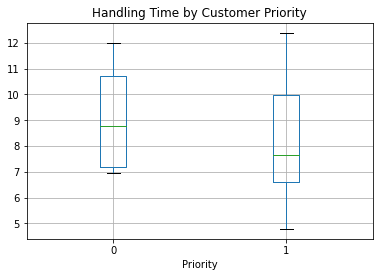

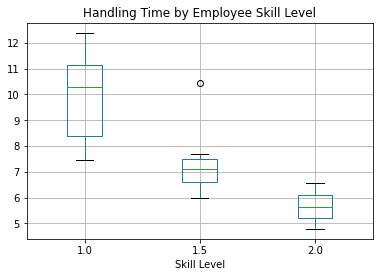

In [4]:
import simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CallCenter:
    def __init__(self, env, num_employees, avg_support_time):
        self.env = env
        self.employee = simpy.PreemptiveResource(env, num_employees)
        self.avg_support_time = avg_support_time
        self.data = []  # For collecting simulation data

    def process_call(self, customer, priority, skill_level):
        with self.employee.request(priority=priority) as req:
            yield req
            handling_time = np.random.normal(self.avg_support_time / skill_level, 2)
            yield self.env.timeout(handling_time)
            self.data.append({'Customer': customer, 'Priority': priority, 'Handling Time': handling_time, 'Skill Level': skill_level})
            print(f"Processed {customer} with priority {priority} at {self.env.now:.2f}")

# Customer generator with VIP support
def customer_generator(env, call_center, customer_interval):
    customer_id = 0
    while True:
        yield env.timeout(customer_interval)
        # Randomly determine if the customer is a VIP
        priority = np.random.choice([0, 1], p=[0.1, 0.9])  # 10% chance of being VIP
        skill_level = np.random.choice([1, 1.5, 2], p=[0.5, 0.3, 0.2])  # Skill level affects handling time
        env.process(call_center.process_call(f"Customer {customer_id}", priority, skill_level))
        customer_id += 1
        
class Customer:
    def __init__(self, id, patience_level, query_complexity_preference):
        self.id = id
        self.patience_level = patience_level
        self.query_complexity_preference = query_complexity_preference

def generate_customer_profiles():
    # Generate customers with different psychological profiles
    profiles = [('High', 'Complex'), ('Medium', 'Simple'), ('Low', 'Medium')]
    return [Customer(i, *np.random.choice(profiles)) for i in range(100)]

class Employee:
    def __init__(self, id, skill_level, shift_length):
        self.id = id
        self.skill_level = skill_level
        self.shift_length = shift_length
        self.efficiency = self.calculate_efficiency()

    def calculate_efficiency(self):
        # Efficiency decreases as the shift length increases beyond a threshold
        return max(0.5, self.skill_level - (self.shift_length - 8) * 0.1)
    
def adjust_resources_based_on_demand(env, call_center, prediction_model):
    while True:
        # Predict the next hour's call volume
        predicted_volume = prediction_model.predict(next_hour_features(env.now))
        # Adjust resources based on predicted volume
        required_employees = calculate_required_employees(predicted_volume)
        call_center.adjust_employees(required_employees)
        yield env.timeout(60)  # Check and adjust hourly



# Initialize and run the simulation
env = simpy.Environment()
call_center = CallCenter(env, num_employees=5, avg_support_time=10)
env.process(customer_generator(env, call_center, customer_interval=5))
simulation_time = 120
env.run(until=simulation_time)

# Convert data to DataFrame for analysis
df = pd.DataFrame(call_center.data)

# Statistical Analysis and Reporting
print(df.describe())

# Visualization of Handling Times by Priority
df.boxplot(column='Handling Time', by='Priority')
plt.title('Handling Time by Customer Priority')
plt.suptitle('')
plt.show()

# Visualization of Handling Times by Skill Level
df.boxplot(column='Handling Time', by='Skill Level')
plt.title('Handling Time by Employee Skill Level')
plt.suptitle('')
plt.show()

# Note: Real-time adjustments and scenario analysis would involve dynamically modifying the simulation parameters
# based on certain triggers or conditions. This could be complex and might require additional logic to monitor
# ongoing metrics and make adjustments.


# Conclusion and Future Directions

Summary: Reflects on the simulations' key outcomes, emphasizing the effectiveness of the implemented features in enhancing the realism and analytical depth of the call center model.

Future Work: Identifies potential areas for further research or improvement, such as integrating machine learning for real-time decision-making, exploring the impact of customer satisfaction metrics, or modeling the effects of training programs on employee performance.

Final Thoughts: This notebook not only serves as a comprehensive guide to simulating call center operations but also as a platform for future exploration and innovation in operational management and predictive analytics.

